<a href="https://colab.research.google.com/github/C-Little26/ECGR4105/blob/main/Hw4/ECGR4105_Hw4_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#necessary libraries
import numpy as np
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
filepath = '/content/drive/My Drive/Machine Learning/Datasets/Housing.csv'
housing = pd.DataFrame(pd.read_csv(filepath))
housing.isnull().sum()*100/housing.shape[0] #use to check for null values

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

In [3]:
#remap yes/no variables to numeric data
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
# define a map function to replace yes/no variables
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [4]:
#reduce X to Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea
x_vars = ['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea']
X = housing[x_vars]
Y = housing['price']

In [5]:
#split between training and validation sets
x_train, x_val, y_train, y_val = train_test_split(X,Y, test_size =0.2, random_state = 0)
x_train.shape

(436, 11)

In [6]:
#standardize all features
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_val = sc_x.fit_transform(x_val)
#y_train = sc_x.fit_transform(y_train.reshape(-1,1))
#y_val = sc_x.fit_transform(y_val)

In [7]:
#set up models
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
#fit models
svr_rbf.fit(x_train,y_train)
svr_lin.fit(x_train,y_train)
svr_poly.fit(x_train,y_train)
#find predictions
yp_rbf = svr_rbf.predict(x_val)
yp_lin = svr_lin.predict(x_val)
yp_poly = svr_poly.predict(x_val)
#find errors
mse_rbf = mean_squared_error(y_val, yp_rbf)
mse_lin = mean_squared_error(y_val,yp_lin)
mse_poly = mean_squared_error(y_val, yp_poly)

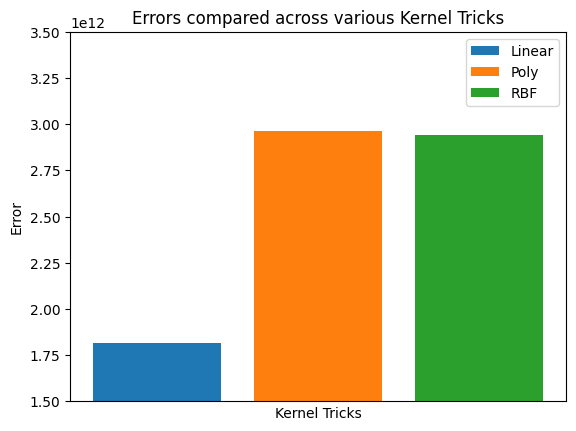

In [23]:
#plot errors against each other
plt.bar(height=mse_lin, x=1, label='Linear')
plt.bar(height=mse_poly, x=2, label='Poly')
plt.bar(height=mse_rbf, x=3, label='RBF')
plt.ylim((1.5E12,3.5E12))
plt.xlabel("Kernel Tricks")
plt.ylabel("Error")
plt.legend()
plt.xticks([])
plt.title("Errors compared across various Kernel Tricks")
plt.show()

In [9]:
#PCA function
def reduceFeatures(x_t,x_v,K):
  pca = PCA(n_components=K)
  x_tr = pca.fit_transform(x_t)
  x_vr = pca.fit_transform(x_v)
  return x_tr, x_vr

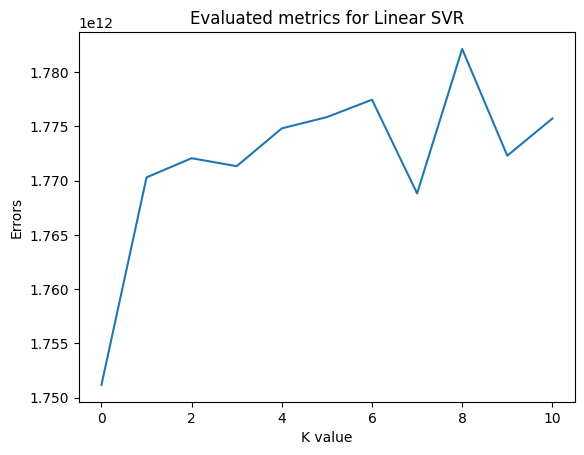

1 
 1775731826510.1038


In [14]:
#find most optimal K value for PCA with linear
min_error = 1E20 #extremely large number, not a specific value
errors = []

for K in range(1,12):
  x_t, x_v = reduceFeatures(x_train,x_val,K)
  clf = SVR(kernel='linear', C=1E3) #redefine classifier
  clf.fit(x_t, y_train) #fit classifier
  y_pred = clf.predict(x_v)
  mse_K = mean_squared_error(y_val,y_pred)

  errors.append(mse_K)
  if (mse_K < min_error):
    min_error = mse_K
    K_best = K

#plot errors over various K's
plt.plot(errors, label="Errors")
plt.xlabel("K value")
plt.ylabel("Errors")
plt.title("Evaluated metrics for Linear SVR")
plt.show()
print(K_best, '\n', mse_K)

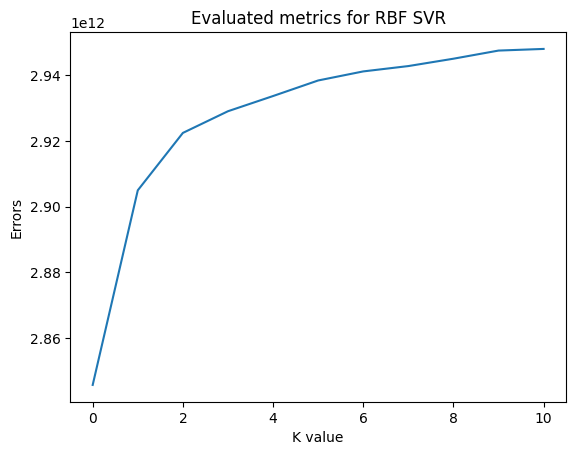

1 
 2947966375732.0454


In [15]:
#find most optimal K value for PCA with rbf
min_error = 1E20 #extremely large number, not a specific value
errors = []

for K in range(1,12):
  x_t, x_v = reduceFeatures(x_train,x_val,K)
  clf = SVR(kernel='rbf', C=1E3) #redefine classifier
  clf.fit(x_t, y_train) #fit classifier
  y_pred = clf.predict(x_v)
  mse_K = mean_squared_error(y_val,y_pred)

  errors.append(mse_K)
  if (mse_K < min_error):
    min_error = mse_K
    K_best = K

#plot errors over various K's
plt.plot(errors, label="Errors")
plt.xlabel("K value")
plt.ylabel("Errors")
plt.title("Evaluated metrics for RBF SVR")
plt.show()
print(K_best, '\n', mse_K)

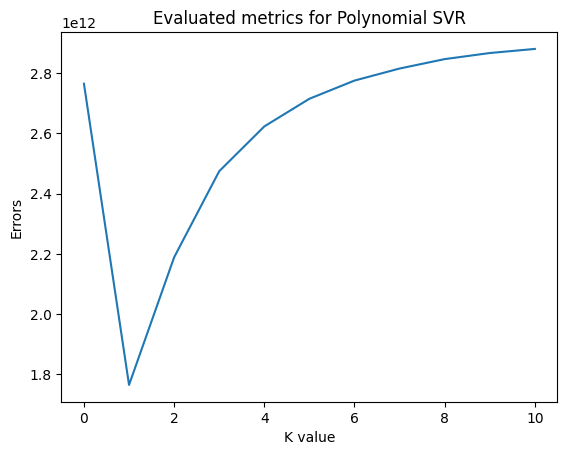

2 
 2879993782766.335


In [16]:
#find most optimal K value for PCA with poly
min_error = 1E20 #extremely large number, not a specific value
errors = []

for K in range(1,12):
  x_t, x_v = reduceFeatures(x_train,x_val,K)
  clf = SVR(kernel='poly', C=1E3) #redefine classifier
  clf.fit(x_t, y_train) #fit classifier
  y_pred = clf.predict(x_v)
  mse_K = mean_squared_error(y_val,y_pred)

  errors.append(mse_K)
  if (mse_K < min_error):
    min_error = mse_K
    K_best = K

#plot errors over various K's
plt.plot(errors, label="Errors")
plt.xlabel("K value")
plt.ylabel("Errors")
plt.title("Evaluated metrics for Polynomial SVR")
plt.show()
print(K_best, '\n', mse_K)